In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Read input data
dir = './'
fDcor = nc.Dataset(f'{dir}Heatmap_figures_1_2_3_data_Daymet_corr.nc')
fDratio = nc.Dataset(f'{dir}/Heatmap_figures_1_2_3_data_Daymet_ratio.nc')
fDbias = nc.Dataset(f'{dir}/Heatmap_figures_1_2_3_data_Daymet_bias.nc')
fLcor = nc.Dataset(f'{dir}/Heatmap_figures_1_2_3_data_Livneh_corr.nc')
fLratio = nc.Dataset(f'{dir}/Heatmap_figures_1_2_3_data_Livneh_ratio.nc')
fLbias = nc.Dataset(f'{dir}/Heatmap_figures_1_2_3_data_Livneh_bias.nc')
varDcor = fDcor.variables['corr']
varDratio = fDratio.variables['ratio']
varDbias = fDbias.variables['bias']
varLcor = fLcor.variables['corr']
varLratio = fLratio.variables['ratio']
varLbias = fLbias.variables['bias']


In [3]:
#Create x and y labels for heatmaps
x_axis_labels = ['Tmax-Annual','Tmax-Winter','Tmax-Spring','Tmax-Summer','Tmax-Fall',\
                 'Tmin-Annual','Tmin-Winter','Tmin-Spring','Tmin-Summer','Tmin-Fall',\
                 'Prcp-Annual','Prcp-Winter','Prcp-Spring','Prcp-Summer','Prcp-Fall',\
                 'T95-Annual','T05-Annual','P95-Annual','WetDays-Annual','FrostDays-Annual']
y_axis_labels = ['GCM:ACCESS-CM2','GCM:BCC-CSM2-MR','GCM:CNRM-ESM2-1','GCM:MPI-ESM1-2-HR','GCM:MRI-ESM2-0','GCM:NorESM2-MM',\
                 'RCM:ACCESS-CM2','RCM:BCC-CSM2-MR','RCM:CNRM-ESM2-1','RCM:MPI-ESM1-2-HR','RCM:MRI-ESM2-0','RCM:NorESM2-MM',\
                 'RCM-Corrected:ACCESS-CM2','RCM-Corrected:BCC-CSM2-MR','RCM-Corrected:CNRM-ESM2-1','RCM-Corrected:MPI-ESM1-2-HR','RCM-Corrected:MRI-ESM2-0','RCM-Corrected:NorESM2-MM',\
                 'DBCCA:ACCESS-CM2','DBCCA:BCC-CSM2-MR','DBCCA:CNRM-ESM2-1','DBCCA:MPI-ESM1-2-HR','DBCCA:MRI-ESM2-0','DBCCA:NorESM2-MM']

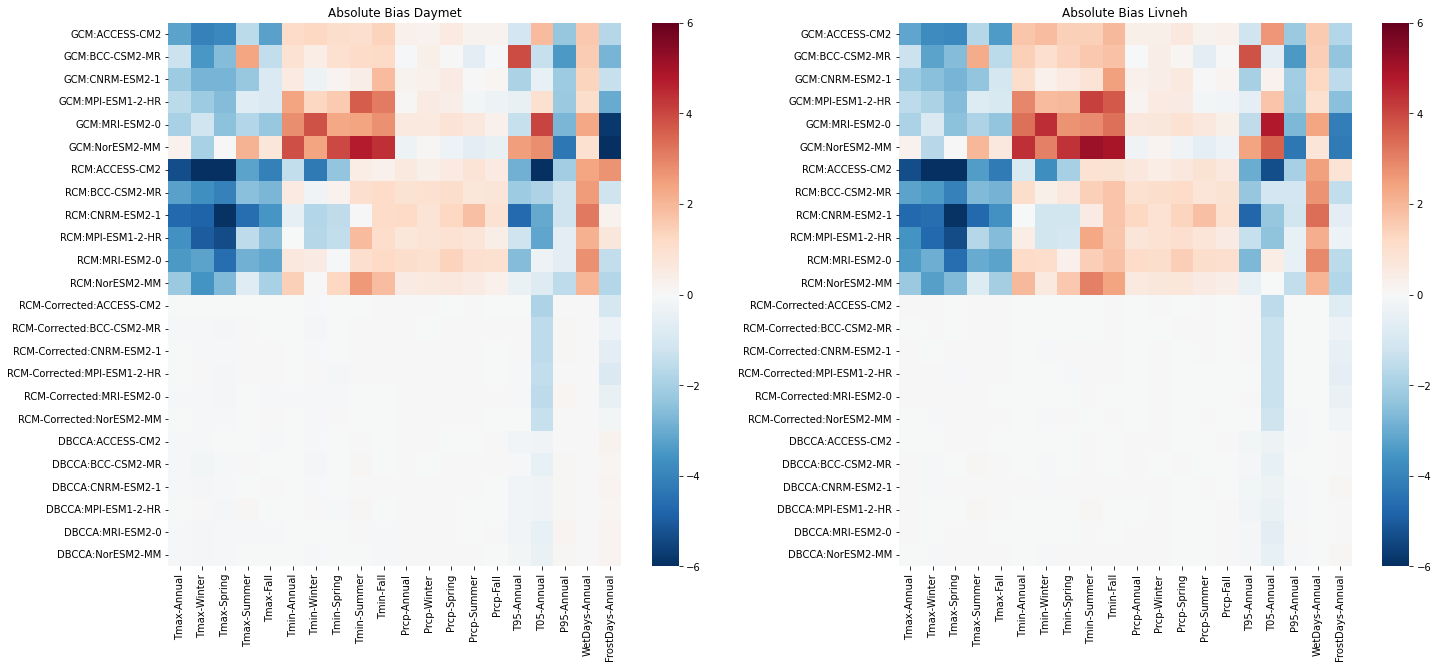

In [4]:
#Plot heatmaps for bias
fig = plt.figure(figsize=(24,10))
ax = fig.subplots(nrows=1, ncols=2)
varLbiasNorm = np.asarray(varLbias)
varDbiasNorm = np.asarray(varDbias)

#Normalize bias in P95, wet days and frost days for presentation
varLbiasNorm[:,17] = varLbiasNorm[:,17]/np.abs(np.mean(varLbiasNorm[:,17]))
varLbiasNorm[:,18] = varLbiasNorm[:,18]/np.abs(np.mean(varLbiasNorm[:,18]))
varLbiasNorm[:,19] = varLbiasNorm[:,19]/np.abs(np.mean(varLbiasNorm[:,19]))

varDbiasNorm[:,17] = varDbiasNorm[:,17]/np.abs(np.mean(varDbiasNorm[:,17]))
varDbiasNorm[:,18] = varDbiasNorm[:,18]/np.abs(np.mean(varDbiasNorm[:,18]))
varDbiasNorm[:,19] = varDbiasNorm[:,19]/np.abs(np.mean(varDbiasNorm[:,19]))


ax[0].set_title('Absolute Bias Daymet')
ax[0].set_aspect("equal")
bplot1   = sns.heatmap(varDbiasNorm,ax=ax[0],cmap="RdBu_r",vmin=-6,vmax=6,xticklabels=x_axis_labels, yticklabels=y_axis_labels);
ax[1].set_title('Absolute Bias Livneh')
ax[1].set_aspect("equal")
bplot1   = sns.heatmap(varLbiasNorm,ax=ax[1],cmap="RdBu_r",vmin=-6,vmax=6,xticklabels=x_axis_labels, yticklabels=y_axis_labels)


plt.savefig('Heatmap_figure1_Bias.pdf')

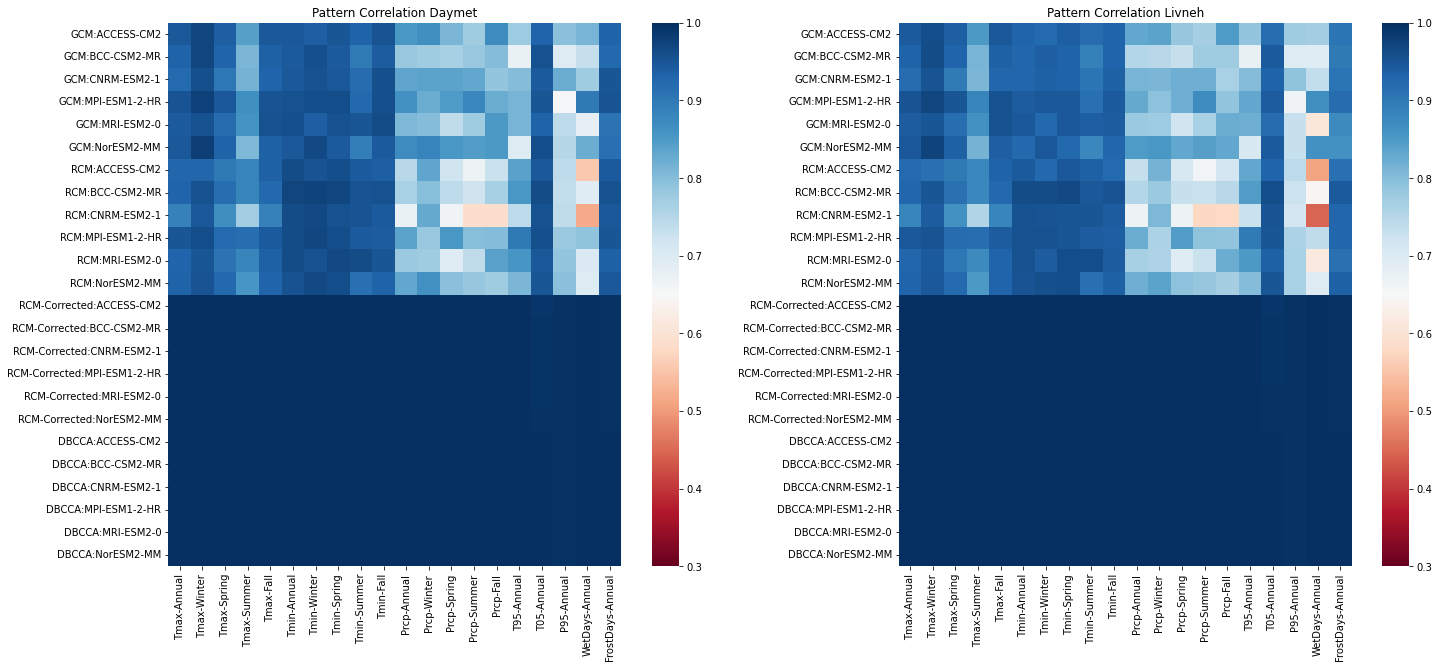

In [5]:
#Plot heatmaps for pattern correlation
fig = plt.figure(figsize=(24,10))
ax = fig.subplots(nrows=1, ncols=2)

ax[0].set_title('Pattern Correlation Daymet')
ax[0].set_aspect("equal")
bplot1   = sns.heatmap(varDcor,ax=ax[0],cmap="RdBu",vmin=0.3,vmax=1,xticklabels=x_axis_labels, yticklabels=y_axis_labels);
ax[1].set_title('Pattern Correlation Livneh')
ax[1].set_aspect("equal")
bplot1   = sns.heatmap(varLcor,ax=ax[1],cmap="RdBu",vmin=0.3,vmax=1,xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.savefig('Heatmap_figure2_Pattern_Correlation.pdf')

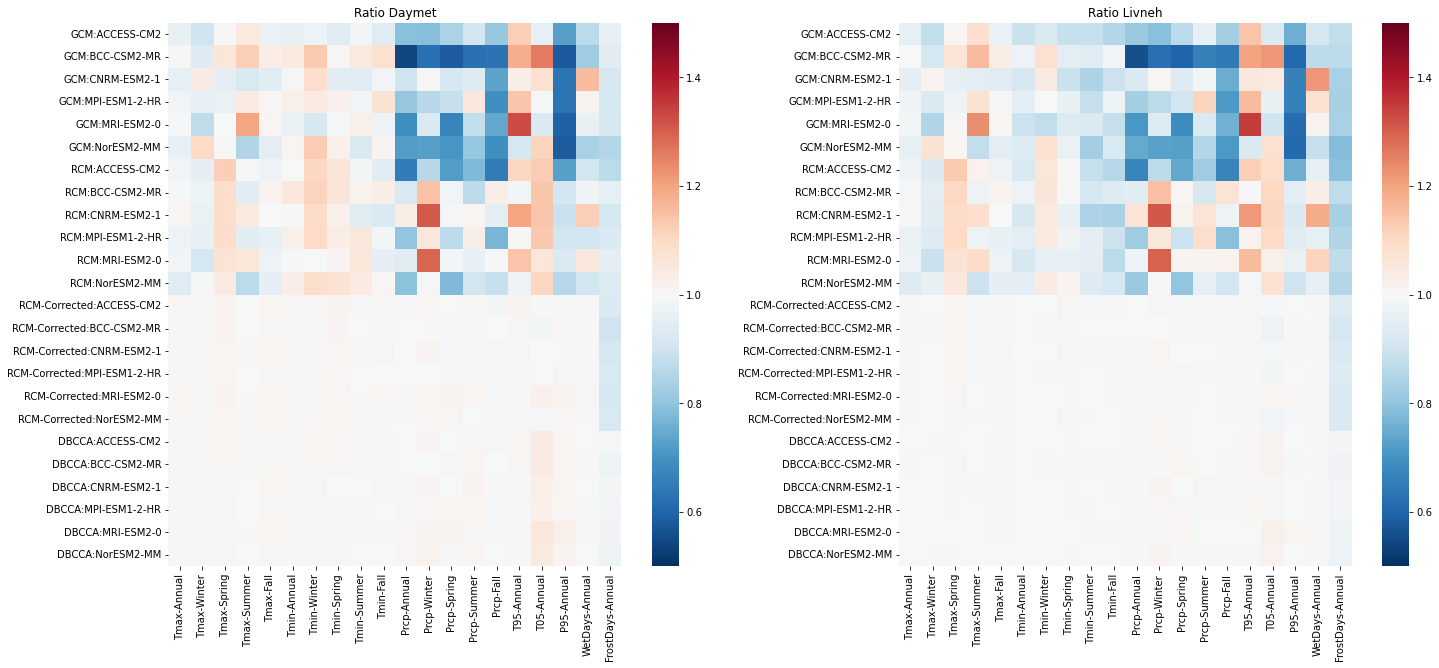

In [6]:
#Plot heatmaps for Ratio of Standard Deviation
fig = plt.figure(figsize=(24,10))
ax = fig.subplots(nrows=1, ncols=2)


ax[0].set_title('Ratio Daymet')
ax[0].set_aspect("equal")
bplot1   = sns.heatmap(varDratio,ax=ax[0],cmap="RdBu_r",vmin=0.5,vmax=1.5,xticklabels=x_axis_labels, yticklabels=y_axis_labels);
ax[1].set_title('Ratio Livneh')
ax[1].set_aspect("equal")
bplot1   = sns.heatmap(varLratio,ax=ax[1],cmap="RdBu_r",vmin=0.5,vmax=1.5,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.savefig('Heatmap_figure3_Ratio_of_Standard_Deviation.pdf')